# Citation Revenue

## Executive Summary

The daily citation revenue on and after October 15th, 2020 is significantly greater than the average daily revenue.

---

## Acquire
1. Aquire the dataset, [Los Angeles Parking Citations](https://www.kaggle.com/cityofLA/los-angeles-parking-citations).
1. Import libraries.
1. Load the dataset using pandas.
1. Display the shape and first/last 2 rows.
1. Display general statistics of the dataset - w/ the # of unique values in each column.
1. Uncover the number of missing values in each column.

## Prepare
- Remove spaces + capitalization from each column name.
- Drop features missing >=74.42\% of their values. 
- Drop unused features: `vin`, `rp_state_plate`, `make`, `body_style`, `color`, `marked_time`, `color_description`, `body_style_description`, `agency_description`, `meter_id`, `ticket_number`, and `violation_code`.
- Cast `issue_date` and `issue_time` to datetime data types.
- Transform `latitude` and `longitude` coordinates from NAD1983StatePlaneCaliforniaVFIPS0405 feet projection to EPSG4326 World Geodetic System 1984.
- Filter dates from 2017-01-01 to 2021-04-12.
- Filter citation issue times from 7:30am to 3:30pm.
- Filter for street sweeping citations.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import plotly
import plotly.express as px
import plotly.graph_objects as go
from datetime import time, timedelta, datetime, date

import src

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = src.prep_sweep_data(src.get_sweep_data())

In [3]:
df.head(2)

,issue_date,issue_time,location,route,agency,violation_description,fine_amount,latitude,longitude,citation_year,citation_month,citation_day,day_of_week,citation_hour,citation_minute
0,2017-01-03,07:35:00,424 NORTH VENICE BLVD,00131,51.0,NO PARK/STREET CLEAN,73.0,33.9864,-118.4678,2017,1,3,Tuesday,7,35
1,2017-01-03,07:37:00,500 CLARA ST,00674,56.0,NO PARK/STREET CLEAN,73.0,34.0569,-118.2329,2017,1,3,Tuesday,7,37


In [4]:
df.tail(2)

,issue_date,issue_time,location,route,agency,violation_description,fine_amount,latitude,longitude,citation_year,citation_month,citation_day,day_of_week,citation_hour,citation_minute
2279061,2021-03-26,13:41:00,12333 HARTSOOK ST,350R1,53.0,NO PARK/STREET CLEAN,73.0,27.5175,-137.9131,2021,3,26,Friday,13,41
2279062,2021-03-26,13:48:00,12333 HARTSOOK ST,350R1,53.0,NO PARK/STREET CLEAN,73.0,27.5175,-137.9131,2021,3,26,Friday,13,48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279063 entries, 0 to 2279062
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   issue_date             datetime64[ns]
 1   issue_time             object        
 2   location               object        
 3   route                  object        
 4   agency                 float64       
 5   violation_description  object        
 6   fine_amount            float64       
 7   latitude               float64       
 8   longitude              float64       
 9   citation_year          int64         
 10  citation_month         int64         
 11  citation_day           int64         
 12  day_of_week            object        
 13  citation_hour          int64         
 14  citation_minute        int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 260.8+ MB


In [6]:
df.describe()

,agency,fine_amount,latitude,longitude,citation_year,citation_month,citation_day,citation_hour,citation_minute
count,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06,2.279063e+06
mean,5.337318e+01,7.299999e+01,3.356876e+01,-1.198637e+02,2.018474e+03,6.320805e+00,1.572020e+01,9.980795e+00,2.615593e+01
std,1.931223e+00,2.297474e-02,1.748079e+00,5.208785e+00,1.229847e+00,3.722988e+00,8.728971e+00,1.695833e+00,1.508315e+01
min,1.000000e+00,5.300000e+01,2.751750e+01,-1.379131e+02,2.017000e+03,1.000000e+00,1.000000e+00,7.000000e+00,0.000000e+00
25%,5.100000e+01,7.300000e+01,3.400970e+01,-1.184516e+02,2.017000e+03,3.000000e+00,8.000000e+00,8.000000e+00,1.400000e+01
50%,5.400000e+01,7.300000e+01,3.405880e+01,-1.183597e+02,2.018000e+03,6.000000e+00,1.600000e+01,1.000000e+01,2.400000e+01
75%,5.500000e+01,7.300000e+01,3.410210e+01,-1.182946e+02,2.019000e+03,1.000000e+01,2.300000e+01,1.200000e+01,3.800000e+01
max,5.800000e+01,9.300000e+01,3.432370e+01,-1.181606e+02,2.021000e+03,1.200000e+01,3.100000e+01,1.500000e+01,5.900000e+01


In [7]:
df.describe(exclude=np.number).T

,count,unique,top,freq,first,last
issue_date,2279063,1097,2020-10-15 00:00:00,8478,2017-01-03,2021-03-26
issue_time,2279063,474,08:20:00,15291,NaT,NaT
location,2279063,626077,6321 COMMODORE SLOAT DR,1144,NaT,NaT
route,2279063,992,00500,103870,NaT,NaT
violation_description,2279063,1,NO PARK/STREET CLEAN,2279063,NaT,NaT
day_of_week,2279063,7,Thursday,517117,NaT,NaT


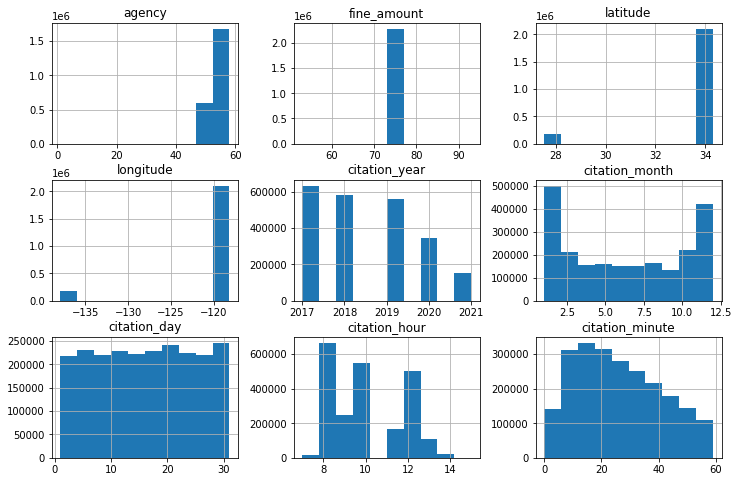

In [8]:
df.hist(figsize=(12, 8));

# Exploration

## Exploration Summary

## Tasks
1. Plot citation revenue over the last 5 years.
    - Learn how to omit zeros from the line graph.
    - Is there a way to create a custom week datetime object? Business day datetime function?
2. Determine the significance of revenue on and after October 15th, 2020.
3. Plot citation revenue for the top 10 street sweeping routes.
4. Determine which routes had significant increases in fines on and after October 15th, 2020.
    - Perform spatial statistics.
5. Summarize finds from street sweeping citation revenue data.

In [9]:
df_sweep = src.street_sweep(data=df)
df_d = src.resample_period(data=df_sweep)
df_m = src.resample_period(data=df_sweep, period='M')
df_d.head()

,revenue,is_business_day
issue_date,,
2017-01-03,199947.0,True
2017-01-04,170893.0,True
2017-01-05,222212.0,True
2017-01-06,166075.0,True
2017-01-07,NaN,False


In [10]:
df_cds = src.aggregate_sweep_days(df_d)
df_m_cds = pd.concat([df_m, df_cds], axis=1)
df_m_cds['revenue'] = df_m_cds['revenue'].where(df_m_cds.num_days_cited != 0, 0)
df_m_cds.revenue = df_m_cds.revenue.astype('int')

In [11]:
df_m_cds['avg_revenue_per_day'] = (df_m_cds['revenue'] / df_m_cds['num_days_cited']).round().replace(np.NaN, 0).astype('int')
a = df_m_cds.copy()
a = a.replace(0, np.NaN)

In [12]:
fig = plotly.subplots.make_subplots(specs=[[{'secondary_y': True}]], shared_xaxes=True)

bar_color = 'rgba(179, 179, 179, 0.45)'

colors = [bar_color] * 51
colors[45] = px.colors.qualitative.Vivid[0]

fig.add_trace(go.Scatter(
        x = a.index,
        y = a.revenue,
        name='Monthly Revenue',
        mode='lines',
        line={'width': 3},
        hovertemplate = '$%{y:,.0f}',
        marker_color=px.colors.qualitative.Vivid[1]),
    secondary_y=True)

fig.add_trace(go.Bar(
        x=a.index,
        y=a.num_days_cited,
        name='Business Days',
        marker_color=colors,
        marker={'line': {'color':'black'}}),
    secondary_y=False)

fig.update_layout(
    width=1200,
    height=400,
    legend_title_text=None,
    hovermode="x unified",
    title="October 2020: The Greatest Revenue in the Fewest Days",
    xaxis_title="Date")

fig.update_yaxes(
    title_text="Business Day",
    # gridwidth=.1,
    gridcolor=plotly.colors.label_rgb((179,179,179)),
    rangemode="tozero",
    side='right',
    zeroline=False,
    secondary_y=False)

fig.update_yaxes(
    title_text="Revenue ($USD)",
    showgrid=False,
    rangemode="tozero",
    side='left',
    zeroline=False,
    secondary_y=True)

fig.show()

# Hypothesis Test: One Tailed T-Test

In [13]:
# 3 standard deviations
confidence_interval = .997

# Threshold to determine whether the outcome is caused by random chance
alpha = (1 - confidence_interval)/2

In [14]:
# Data to calculate z-scores using precovid values to calculate the mean and std
daily_revenue_precovid = df_d.loc[df_d.index < '2020-03-15']
daily_revenue_precovid = daily_revenue_precovid.groupby('issue_date').revenue.sum()
mean_precovid, std_precovid = daily_revenue_precovid.agg(['mean', 'std']).values

# Create subplots of routes with the same sweep times.
fig = px.histogram(data_frame=df.sort_values(by='issue_time'),
                   x='issue_time',
                   title='Distribution of Citation Times',
                   labels={'y':'Count', 'issue_time':'Citation Time (24HR)'})

fig.update_layout(xaxis_range=[time(hour=7, minute=30, second=0), time(hour=15, minute=30, second=0)])
fig.show()

## How much daily revenue is generated from street sweeper citations?
### Daily Revenue from Street Sweeper Citations
The number of street sweeping citations increased in October 2020.

# Daily street sweeping citation revenue
daily_revenue = df.groupby('issue_date').fine_amount.sum()
daily_revenue.index = pd.to_datetime(daily_revenue.index)

sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axhline(daily_revenue.mean(), color='black', label='Average Revenue')

plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200', '$400', '$600', '$800',])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

### Anomaly: Declaration of Local Emergency

sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axvspan('2020-03-16', '2020-10-14', color='grey', alpha=.25)
plt.text('2020-03-29', 890_000, 'Declaration of\nLocal Emergency', fontsize=11)


plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200', '$400', '$600', '$800',])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

sns.set_context('talk')

# Plot daily revenue from street sweeping citations
daily_revenue.plot(figsize=(14, 7), label='Revenue', color='DodgerBlue')
plt.axhline(daily_revenue.mean(), color='black', label='Average Revenue')
plt.axvline(datetime.datetime(2020, 10, 15), color='red', linestyle="--", label='October 15, 2020')

plt.title("Daily Revenue from Street Sweeping Citations")
plt.xlabel('')
plt.ylabel("Revenue (in thousand's)")

plt.xticks(rotation=0, horizontalalignment='center', fontsize=13)
plt.yticks(range(0, 1_000_000, 200_000), ['$0', '$200K', '$400K', '$600K', '$800K',])
plt.ylim(0, 1_000_000)

plt.legend(loc=2, framealpha=.8);

## Add section comparing citation time distributions before and after parking was enforced.

Integrate articles:
- https://www.lamag.com/citythinkblog/street-sweeping-cutbacks/
Did the city go back to street sweeping every week?

Using the system, at www.streetsla.lacity.org/sweeping, residents can input an address and be notified by email 24 hours before the sweeper will be coming through to avoid a ticket. Residents can also call 311 for information or use the My311 app.
- https://www.streetsla.lacity.org/street-maintenance-division


# Results